<a href="https://colab.research.google.com/github/RavindrapalRathore/Task6/blob/main/Task_6_%2CAssignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [5]:
df = pd.read_csv("/content/drive/MyDrive/dataset/task6/car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [7]:
df.shape

(804, 12)

In [8]:
print(f"The original dataset has {df.shape[0]} rows")
print(f"The original dataset has {df.shape[1]} columns")

The original dataset has 804 rows
The original dataset has 12 columns


In [9]:
# Printing all the Numerical Features in Dataset.
numerical_features=[x for x in df.columns if df[x].dtype!="object"]
numerical_features

['Price',
 'Mileage',
 'Cylinder',
 'Liter',
 'Doors',
 'Cruise',
 'Sound',
 'Leather']

In [10]:
# Printing all the Categorical Features in Dataset.
categorical_features=[x for x in df.columns if df[x].dtype=="object"]
categorical_features

['Make', 'Model', 'Trim', 'Type']

In [11]:
# Unique Values in feature's before cleaning.
print("The number of Make's before analysing and cleaning:",len(df["Make"].unique()))
print("------------------------------------------------------")
df["Make"].unique()

The number of Make's before analysing and cleaning: 6
------------------------------------------------------


array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [12]:
# Unique Values in feature's before cleaning.
print("The number of Model's before analysing and cleaning:",len(df["Model"].unique()))
print("------------------------------------------------------")
df["Model"].unique()

The number of Model's before analysing and cleaning: 32
------------------------------------------------------


array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [13]:
# Unique Values in feature's before cleaning.
print("The number of Trim's before analysing and cleaning:",len(df["Trim"].unique()))
print("------------------------------------------------------")
df["Trim"].unique()

The number of Trim's before analysing and cleaning: 47
------------------------------------------------------


array(['Sedan 4D', 'CX Sedan 4D', 'CXL Sedan 4D', 'CXS Sedan 4D',
       'Custom Sedan 4D', 'Limited Sedan 4D', 'Special Ed Ultra 4D',
       'DHS Sedan 4D', 'DTS Sedan 4D', 'Hardtop Conv 2D',
       'LS Hatchback 4D', 'LS Sedan 4D', 'LT Hatchback 4D', 'LT Sedan 4D',
       'SVM Hatchback 4D', 'SVM Sedan 4D', 'Coupe 2D', 'LS Coupe 2D',
       'LS Sport Coupe 2D', 'LS Sport Sedan 4D', 'Conv 2D', 'SS Sedan 4D',
       'LS MAXX Hback 4D', 'LT MAXX Hback 4D', 'MAXX Hback 4D',
       'LT Coupe 2D', 'SS Coupe 2D', 'GXP Sedan 4D', 'SE Sedan 4D',
       'SLE Sedan 4D', 'GT Sedan 4D', 'GT Coupe 2D', 'GTP Sedan 4D',
       'AWD Sportwagon 4D', 'GT Sportwagon', 'Sportwagon 4D',
       'Linear Conv 2D', 'Linear Sedan 4D', 'Aero Conv 2D',
       'Aero Sedan 4D', 'Arc Conv 2D', 'Arc Sedan 4D', 'Arc Wagon 4D',
       'Linear Wagon 4D', 'Aero Wagon 4D', 'Quad Coupe 2D',
       'L300 Sedan 4D'], dtype=object)

In [14]:
# Unique Values in feature's before cleaning.
print("The number of Type's before analysing and cleaning:",len(df["Type"].unique()))
print("------------------------------------------------------")
df["Type"].unique()

The number of Type's before analysing and cleaning: 5
------------------------------------------------------


array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

There is no null or nan value within our features .

Features with object type has to be converted . 



In [15]:
def outlier(df):
  for col in df.select_dtypes(exclude="object").columns:
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.75)
    iqr = q2 - q1
    lower_fence = q1 - 1.5*(iqr)
    upper_fence = q2 + 1.5*(iqr)
    total_outliers = df.loc[(df[col] < lower_fence) | (df[col] > upper_fence)]
    if len(total_outliers):
      print(f"Feature: {col} ---> Outlier : {len(total_outliers)}")
outlier(df)

Feature: Price ---> Outlier : 17
Feature: Mileage ---> Outlier : 5
Feature: Doors ---> Outlier : 190
Feature: Cruise ---> Outlier : 199


In [16]:
#function to cap outliers
def cap(df,column_name):
  v=df[column_name]
  q1 = v.quantile(.25)
  q3 = v.quantile(0.75)
  iqr=q3-q1 # interquantile range 

  upper_limit = q3+ (1.5*iqr)
  lower_limit = q1- (1.5*iqr)

  df[column_name] =np.where(df[column_name]> upper_limit, upper_limit, np.where(df[column_name] < lower_limit,lower_limit,df[column_name]))
  return df[column_name]

In [17]:
continuous_feature =['Price','Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
for i in continuous_feature:
  df[f'{i}'] = cap(df,i)

**TASK ---> Part 1**

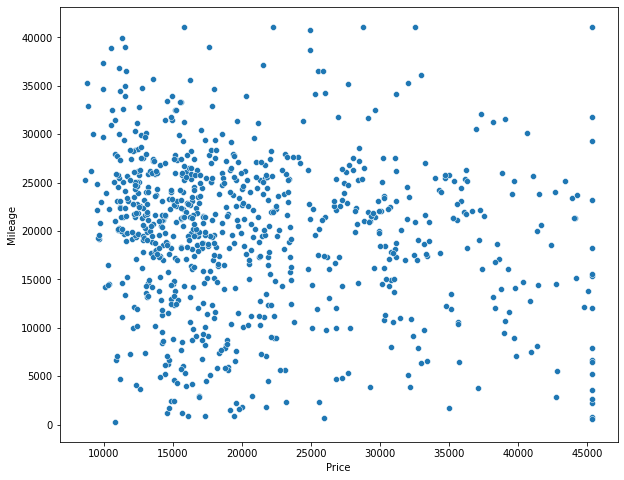

,Mileage,Price
Mileage,1.000000,-0.138997
Price,-0.138997,1.000000


In [18]:
#EDA of Mileage vs Price 
plt.figure(figsize=(10,8))
sns.scatterplot(x='Price',y='Mileage', data=df, palette='bright')
plt.show()
df[["Mileage","Price"]].corr()

In [19]:
X= df['Mileage'].values.reshape(-1,1)
y=df['Price'].values 

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
# scaling our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [22]:
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [23]:
model_1.coef_

array([-1330.31222492])

In [24]:
model_1.intercept_

21045.817902928175

In [25]:
cross_val_linear_model=cross_val_score(model_1,X_train,y_train,cv=8).mean()
cross_val_linear_model

0.005234212833441304

In [26]:
y_pred=model_1.predict(X_test)

In [27]:
R2_score = r2_score(y_test,y_pred)
print('R2 score here is',R2_score)

R2 score here is 0.007071046266349912


The above R2 score reveals that the equation used is not a good fit for the data . 

This result can be explained from the very low correlation between the feature mileage and Price .

**TASK ---> Part 2**

Tasks, Part 2
1)Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

2)Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

3)Find the combination of the factors that is the best predictor for price.

In [28]:
df_2=df[['Price','Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]

df_2.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,6.0,3.1,4.0,1.0,1.0,1.0
1,17542.036083,9135.0,6.0,3.1,4.0,1.0,1.0,0.0
2,16218.847862,13196.0,6.0,3.1,4.0,1.0,1.0,0.0
3,16336.913140,16342.0,6.0,3.1,4.0,1.0,0.0,0.0
4,16339.170324,19832.0,6.0,3.1,4.0,1.0,0.0,1.0


In [29]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    float64
 2   Cylinder  804 non-null    float64
 3   Liter     804 non-null    float64
 4   Doors     804 non-null    float64
 5   Cruise    804 non-null    float64
 6   Sound     804 non-null    float64
 7   Leather   804 non-null    float64
dtypes: float64(8)
memory usage: 50.4 KB


In [30]:
#Cruice is not relevent for model building as per feature importance data
df_2.drop('Cruise',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


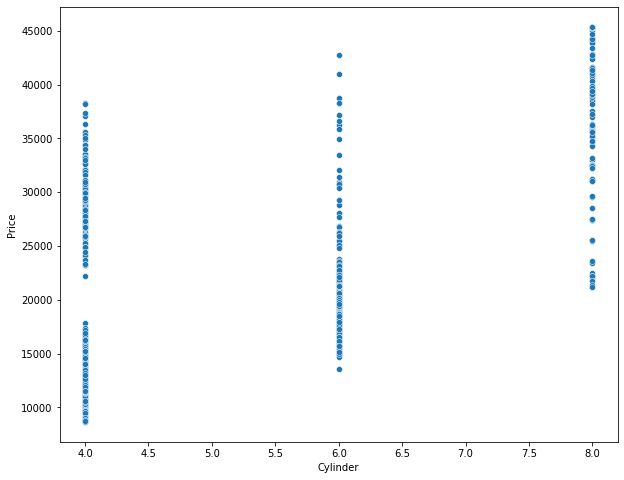

,Cylinder,Price
Cylinder,1.000000,0.569795
Price,0.569795,1.000000


In [31]:
#EDA of Cylinder vs Price 
plt.figure(figsize=(10,8))
sns.scatterplot(y='Price',x='Cylinder', data=df_2, palette='bright')
plt.show()
df_2[["Cylinder","Price"]].corr()

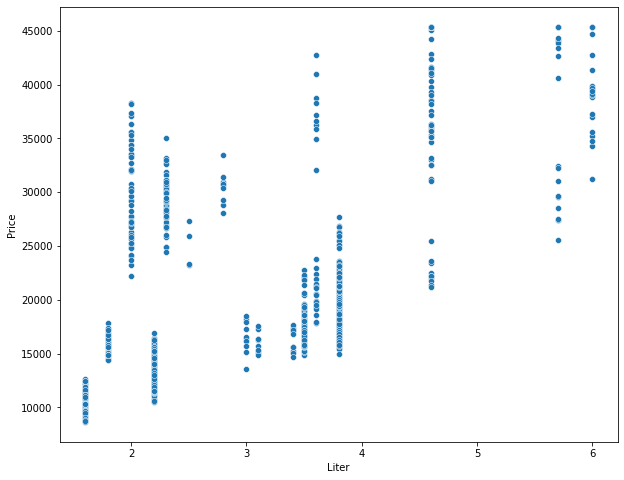

,Liter,Price
Liter,1.000000,0.570744
Price,0.570744,1.000000


In [32]:
#EDA of Liter vs Price 
plt.figure(figsize=(10,8))
sns.scatterplot(y='Price',x='Liter', data=df_2, palette='bright')
plt.show()
df_2[["Liter","Price"]].corr()

In [33]:
X=df_2.iloc[:,1:].values 
y=df_2.iloc[:,0]

In [34]:
np.shape(y)

(804,)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [36]:
# scaling our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [37]:
model_2 = LinearRegression()
model_2.fit(X_train,y_train)

LinearRegression()

In [38]:
model_2.coef_

array([-1282.41725529,  2240.35376745,  3115.83890396,     0.        ,
       -1067.22374101,  1420.80845536])

In [39]:
model_2.intercept_

21186.37971430407

In [40]:
df_imp = pd.DataFrame({'Features':df_2.columns[1:],'Importance':abs(np.array(model_2.coef_))})
a=df_imp.sort_values(by="Importance",ascending=False)
a

,Features,Importance
2,Liter,3115.838904
1,Cylinder,2240.353767
5,Leather,1420.808455
0,Mileage,1282.417255
4,Sound,1067.223741
3,Doors,0.000000


In [41]:
cross_val_linear_model=cross_val_score(model_1,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.3899516299550951

In [42]:
y_pred=model_2.predict(X_test)

In [43]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare

,Actual,Predicted
8,14862.093870,24046.780324
575,16256.236168,22981.228276
616,15802.652861,14055.069515
142,45061.951935,31110.044346
236,12425.389171,16059.919452
...,...,...
214,9665.848860,14843.524130
765,15110.192598,16029.222748
593,12878.046829,16630.356334
21,23785.922526,25404.742247


In [44]:
R2_score = r2_score(y_test,y_pred)
print('R2 score here is',R2_score)

R2 score here is 0.26886371153811905


The model above is also not a good fit since its R2 score is way lower .

**Tasks, Hard Mode

1)Research dummy variables in scikit-learn to see how to use the make, model, and body type.

2)Find the best combination of factors to predict price.**

In [46]:
data =pd.read_csv("/content/drive/MyDrive/dataset/task6/car_data.csv")
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [47]:
data = pd.get_dummies(data,columns=['Make',"Model","Type"])
data.head()

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [48]:
data.drop("Trim",axis=1,inplace=True) 

In [49]:
X = data.iloc[:,1:].values
y= data.iloc[:,0]

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# # scaling our data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression
model_3 = LinearRegression()
model_3.fit(X_train,y_train)

LinearRegression()

In [52]:
model_3.coef_

array([-1.82644382e-01,  5.95287639e+02,  1.11443377e+03, -1.28175924e+03,
       -7.51184624e-01,  1.80842473e+02,  3.73859801e+02, -3.11485257e+03,
        1.29848959e+04, -4.82490765e+03, -4.63324431e+03,  4.61081605e+03,
       -5.02270744e+03, -2.68951433e+03,  2.98672355e+02,  1.68612874e+03,
        3.27908143e+03,  2.03644787e+03, -5.16340968e+03,  4.56994905e+02,
        4.10976600e+03, -6.63896246e+03, -4.01598863e+03, -4.58059948e+03,
       -3.08871521e+03, -3.15409287e+03,  1.21571561e+04, -3.55277018e+03,
        2.32669903e+02,  5.87997927e+03, -4.11460043e+03, -1.43729476e+03,
        4.32140162e+02, -2.81789914e+03, -2.20480830e+03,  2.01158428e+02,
       -1.25720245e+03, -2.48469539e+03,  4.92697876e+02,  2.52179093e+03,
       -1.55328331e+02,  3.05009992e+03, -4.48628136e+03, -1.16471184e+03,
        1.61720910e+04,  3.43608090e+03, -2.79520128e+03, -3.95367930e+02,
       -5.06976430e+02,  2.61464741e+02])

In [53]:
df_imp = pd.DataFrame({'Features':data.columns[1:],'Importance':abs(np.array(model_3.coef_))})
a=df_imp.sort_values(by="Importance",ascending=False)
a

,Features,Importance
44,Model_XLR-V8,16172.090968
8,Make_Cadillac,12984.895914
26,Model_Corvette,12157.156094
21,Model_CTS,6638.962457
29,Model_GTO,5879.979270
18,Model_AVEO,5163.409682
12,Make_Saturn,5022.707439
9,Make_Chevrolet,4824.907653
10,Make_Pontiac,4633.244309
11,Make_SAAB,4610.816054


In [54]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(model_3,X_train,y_train,cv=8).mean()
cross_val_linear_model

0.9770341913411806

In [55]:
y_pred=model_3.predict(X_test)

In [56]:
from sklearn.metrics import r2_score
R2_score = r2_score(y_test,y_pred)
print('R2 score here is',R2_score)

R2 score here is 0.9796689658689964


The final model gives an R2 score of 97.9% . Hense it could be concluded that the above model in a good fit for the data .